# Partie 4 - Datavisualisation avec des données préparées

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
df = pd.read_csv('weather_data_1000_cleaned.csv')
print(df.head())

                  Date  Temperature  Precipitation  Humidity   Latitude  \
0  2023-01-01 12:00:00         14.8              0      33.1  30.828749   
1  2023-01-01 21:00:00          8.4              0      52.3  82.762384   
2  2023-01-02 04:00:00         14.6              0      56.7 -19.278880   
3  2023-01-03 00:00:00          7.5              0      60.7 -23.008814   
4  2023-01-03 10:00:00         14.1              0      53.7 -20.029257   

    Longitude  Temperature_F  Is_Hot  Temp_Fahrenheit  
0  -71.000954          58.64       0            58.64  
1  -19.613587          47.12       0            47.12  
2 -106.536820          58.28       0            58.28  
3  -34.082870          45.50       0            45.50  
4  174.475612          57.38       0            57.38  


In [89]:
import calendar

# Convert the date column to datetime, then extract the month
df['Month'] = pd.DatetimeIndex(df['Date']).month

# Convert the month number to month name
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

# Convert the month column to categorical, so the order of the months is preserved
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df['Month'] = pd.Categorical(df['Month'], categories=months, ordered=True)

# Sort the data by month
df.sort_values('Month', inplace=True)

print(df.head())
monthly_temp = df.groupby('Month', observed=False)['Temperature'].mean()
monthly_precip = df.groupby('Month', observed=False)['Precipitation'].sum()
monthly_humidity = df.groupby('Month', observed=False)['Humidity'].mean()

# Plot the average temperature by month
ordered_rainy_months = monthly_precip.sort_values(ascending=False)
print("Les mois les plus pluvieux sont: ", ordered_rainy_months)

print("Les mois les plus humides sont: ", monthly_humidity.sort_values(ascending=False))



                   Date  Temperature  Precipitation  Humidity   Latitude  \
0   2023-01-01 12:00:00         14.8              0      33.1  30.828749   
60  2023-01-24 03:00:00         17.4              0      65.2  41.439909   
59  2023-01-23 18:00:00         13.2              0      56.2 -75.790907   
58  2023-01-23 13:00:00         12.8              0      66.2  34.562026   
57  2023-01-23 12:00:00         13.8              0      45.3 -69.015047   

     Longitude  Temperature_F  Is_Hot  Temp_Fahrenheit Month  
0   -71.000954          58.64       0            58.64   Jan  
60 -159.338936          63.32       0            63.32   Jan  
59  178.464403          55.76       0            55.76   Jan  
58 -119.228398          55.04       0            55.04   Jan  
57  -55.591349          56.84       0            56.84   Jan  
Les mois les plus pluvieux sont:  Month
Feb    235
Nov    190
Apr    185
Jun    165
Oct    160
May    160
Sep    145
Aug    135
Mar    130
Jan    130
Dec    110
Jul 

# Etape 1 - Préparer les données pour une analyse mensuelle

Les mois avec les précipitations les plus élevées sont Février, Novembre et Avril.
 
Il y a en effet une différence notable entre les mois en terme d'humidité, par exemple Avril a le double par rapport à Aout.

# Etape 2 - Créer une courbe pour les températures mensuelles

Text(0, 0.5, 'Température')

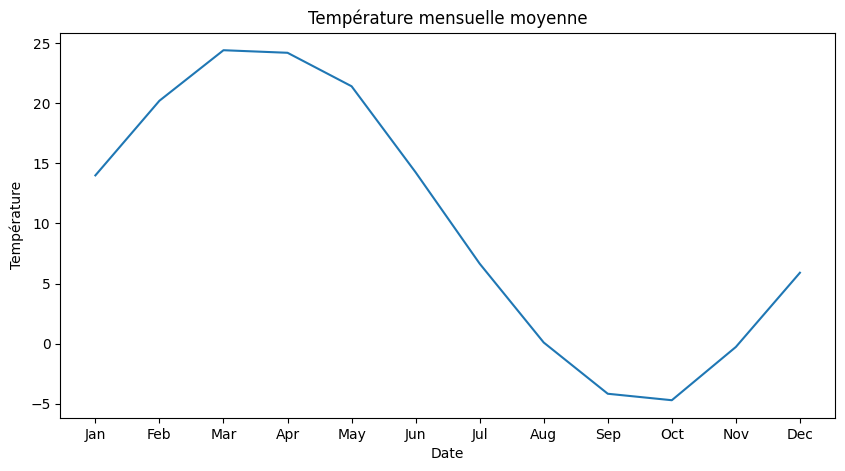

In [90]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_temp, label='Temperature')
plt.title('Température mensuelle moyenne')
plt.xlabel('Date')
plt.ylabel('Température')

La température est la plus élevée en Mars.

Elles ne suivent pas une tendance logique pour un climat européen, mais pourraient faire sens dans le cadre d'un autre pays.

# Etape 3 - Visualiser les précipitations mensuelles avec un historigramme

Text(0.5, 0, 'Précipitations')

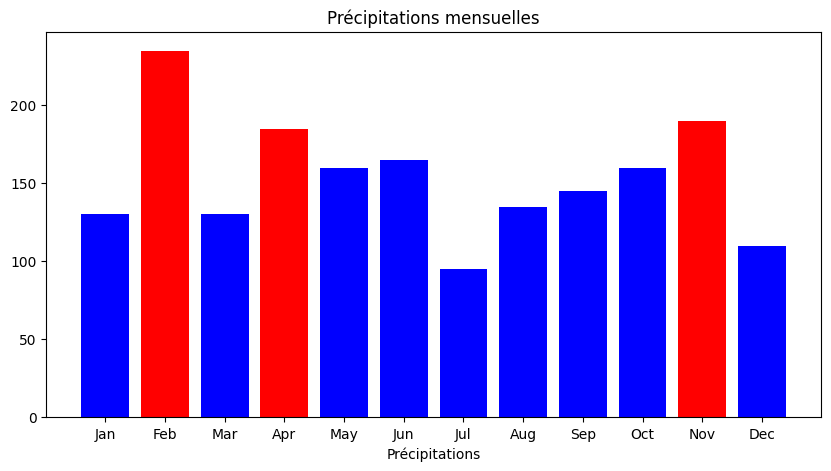

In [91]:
plt.figure(figsize=(10, 5))

# Plotting the monthly precipitation
# Highlighting the top 3 rainy months
plt.bar(monthly_precip.index, monthly_precip, label='Precipitation', color=['red' if x in ordered_rainy_months[:3].index else 'blue' for x in monthly_precip.index])
plt.title('Précipitations mensuelles')
plt.xlabel('Précipitations')

Les mois avec les précipitations les plus importantes sont Février, Avril et Novembre.

<Axes: >

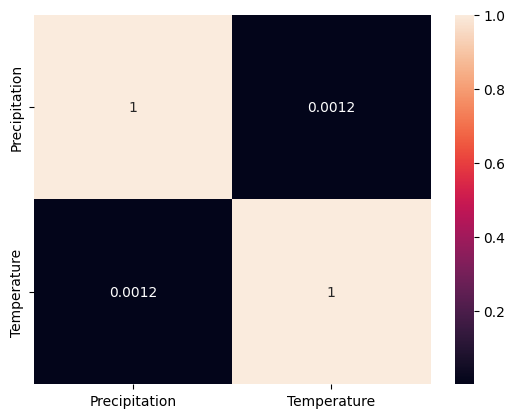

In [92]:
sns.heatmap(df[['Precipitation', 'Temperature']].corr(numeric_only=True), annot=True)

La corrélation entre les précipitations et la température est quasiment nulle.

# Etape 4 - Créer un tableau de bord interactif

In [108]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig=make_subplots(
        specs=[[{"secondary_y": True}]])
fig.update_layout(title_text='Température et précipitations mensuelles')   

fig.update_layout(xaxis2= {'anchor': 'y', 'overlaying': 'x', 'side': 'top'},yaxis_domain=[0, 0.94])

fig.add_trace(
    go.Bar(x=monthly_precip.index,
           y=monthly_precip,
           name="Précipitations",
          ), secondary_y=False)
fig.add_trace(
    go.Scatter(x=monthly_temp.index,
            y=monthly_temp,
            name="Température",
            line_color="#ee0000"), secondary_y=True)
fig.data[1].update(xaxis='x2')
fig.update_layout(width=700, height=475)